In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
%matplotlib inline
pd.options.display.max_columns = 999

## Reading in Data 

In [20]:
df = pd.read_csv('final.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [21]:
df.tail(n=3)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,H_GS_H,H_GS_A,H_GR_H,H_GR_A,H_TGS,H_TGR,H_AvGS_H,H_AvGS_A,H_AvGR_H,H_AvGR_A,H_Av_TGS,H_Av_TGR,H_Pnt_H,H_Pnt_A,H_T_pnt,H_Av_Pnt_H,H_Av_pnt_A,H_Av_T_pnt,Aw_GS_H,Aw_GS_A,Aw_GR_H,Aw_GR_A,Aw_TGS,Aw_TGR,Aw_AvGS_H,Aw_AvGS_A,Aw_AvGR_H,Aw_AvGR_A,Aw_Av_TGS,Aw_Av_TGR,Aw_Pnt_H,Aw_Pnt_A,Aw_T_pnt,Aw_Av_Pnt_H,Aw_Av_pnt_A,Aw_Av_T_pnt,DIFF_av_TP,DIFF_av_HP-AP,SUMM_av_HGSH+AGRA,SUMM_av_HGRH+AGSA,SUMM_av_HTGS+ATGR,SUMM_av_HTGR+ATGS
280,19/03/17,Man City,Liverpool,1,1,D,0,0,D,M Oliver,23.0,30.0,13.0,16.0,53.0,29.0,1.769231,2.142857,1.000000,1.142857,1.962963,1.074074,26.0,30.0,56.0,2.000000,2.142857,2.074074,36.0,24.0,13.0,22.0,60.0,35.0,2.571429,1.714286,0.928571,1.571429,2.142857,1.250000,33.0,22.0,55.0,2.357143,1.571429,1.964286,0.109788,0.428571,3.340659,2.714286,3.212963,3.216931
281,19/03/17,Middlesbrough,Man United,1,3,A,0,1,A,J Moss,11.0,8.0,14.0,16.0,19.0,30.0,0.846154,0.571429,1.076923,1.142857,0.703704,1.111111,13.0,9.0,22.0,1.000000,0.642857,0.814815,20.0,19.0,10.0,12.0,39.0,22.0,1.428571,1.583333,0.714286,1.000000,1.500000,0.846154,25.0,24.0,49.0,1.785714,2.000000,1.884615,-1.069801,-1.000000,1.846154,2.660256,1.549858,2.611111
282,19/03/17,Tottenham,Southampton,2,1,H,2,0,H,A Marriner,33.0,20.0,7.0,13.0,53.0,20.0,2.357143,1.538462,0.500000,1.000000,1.962963,0.740741,38.0,18.0,56.0,2.714286,1.384615,2.074074,14.0,18.0,14.0,20.0,32.0,34.0,1.166667,1.285714,1.166667,1.428571,1.230769,1.307692,18.0,15.0,33.0,1.500000,1.071429,1.269231,0.804843,1.642857,3.785714,1.785714,3.270655,1.971510


In [26]:
Y = df.iloc[:, 5]
X = df.iloc[:, 10:]

## Normalize 

In [27]:
df_norm = (X - X.mean()) / (X.max() - X.min())

In [29]:
df_norm.head(n=3)

,H_GS_H,H_GS_A,H_GR_H,H_GR_A,H_TGS,H_TGR,H_AvGS_H,H_AvGS_A,H_AvGR_H,H_AvGR_A,H_Av_TGS,H_Av_TGR,H_Pnt_H,H_Pnt_A,H_T_pnt,H_Av_Pnt_H,H_Av_pnt_A,H_Av_T_pnt,Aw_GS_H,Aw_GS_A,Aw_GR_H,Aw_GR_A,Aw_TGS,Aw_TGR,Aw_AvGS_H,Aw_AvGS_A,Aw_AvGR_H,Aw_AvGR_A,Aw_Av_TGS,Aw_Av_TGR,Aw_Pnt_H,Aw_Pnt_A,Aw_T_pnt,Aw_Av_Pnt_H,Aw_Av_pnt_A,Aw_Av_T_pnt,DIFF_av_TP,DIFF_av_HP-AP,SUMM_av_HGSH+AGRA,SUMM_av_HGRH+AGSA,SUMM_av_HTGS+ATGR,SUMM_av_HTGR+ATGS
0,-0.30846,-0.288575,-0.291898,-0.363844,-0.330084,-0.341268,-0.319226,-0.29455,-0.29332,-0.447175,-0.440477,-0.48086,-0.281012,-0.265371,-0.31066,-0.482572,-0.37418,-0.436433,-0.312132,-0.276959,-0.290106,-0.341616,-0.321143,-0.316283,-0.332696,-0.288534,-0.303171,-0.432065,-0.340617,-0.337381,-0.320475,-0.24629,-0.286754,-0.502421,-0.36823,-0.448838,0.007443,-0.057171,-0.493154,-0.465483,-0.534191,-0.541775
1,-0.30846,-0.288575,-0.291898,-0.363844,-0.330084,-0.341268,-0.319226,-0.29455,-0.29332,-0.447175,-0.440477,-0.48086,-0.281012,-0.265371,-0.31066,-0.482572,-0.37418,-0.436433,-0.312132,-0.276959,-0.290106,-0.341616,-0.321143,-0.316283,-0.332696,-0.288534,-0.303171,-0.432065,-0.340617,-0.337381,-0.320475,-0.24629,-0.286754,-0.502421,-0.36823,-0.448838,0.007443,-0.057171,-0.493154,-0.465483,-0.534191,-0.541775
2,-0.30846,-0.288575,-0.291898,-0.363844,-0.330084,-0.341268,-0.319226,-0.29455,-0.29332,-0.447175,-0.440477,-0.48086,-0.281012,-0.265371,-0.31066,-0.482572,-0.37418,-0.436433,-0.312132,-0.276959,-0.290106,-0.341616,-0.321143,-0.316283,-0.332696,-0.288534,-0.303171,-0.432065,-0.340617,-0.337381,-0.320475,-0.24629,-0.286754,-0.502421,-0.36823,-0.448838,0.007443,-0.057171,-0.493154,-0.465483,-0.534191,-0.541775


## PCA 

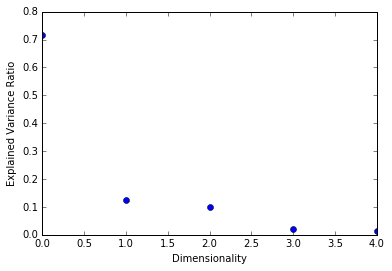

In [35]:
n=5 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

[ 0.7177369   0.12299244  0.09928198  0.01944655  0.01187341]


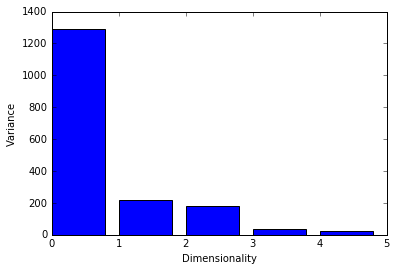

In [36]:
n=5 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.savefig('PCA_components')
plt.show()